# Assignment 1

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )


In [11]:
from PIL import Image
import io
import base64
import cv2
import matplotlib.pyplot as plt
import numpy as np

base64_image = """/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxAQEBUQEBAVFhUQFRUQFRAQFQ8YFRUVFRIWFhUVFRUYHSggGBolGxUVITEiJSkrLi4uFx8zODMsNygtLisBCgoKDg0OFxAQFS0dHR0tLS4tLS0tLS0tLS0tLS0tLS0rLS0tLS0rLi0tLS0tLSstLSstLS0tLS0tLS0uNi0rLf/AABEIALcBFAMBIgACEQEDEQH/xAAcAAACAgMBAQAAAAAAAAAAAAAAAQIFAwQGBwj/xAA6EAABAwIEAwUGBQQCAwEAAAABAAIRAyEEBRIxQVFhBiJxgZETMqGx0fAHQsHh8RVScoIzYiNDshT/xAAYAQEBAQEBAAAAAAAAAAAAAAAAAQIDBP/EACIRAQEAAgICAgIDAAAAAAAAAAABAhEDIRIxQVETIgRh8P/aAAwDAQACEQMRAD8A9hhJxUlFwW2WAlSCiWphVE0kSmEAAphJqkFAFMITCKEwhCgEJoQJCaEAqXtXm7cJhn1iQCBDZ5lXJK8Z/GPP9dVuEYbU7vg8SCY+XqpbqLjN1wNeu6s91R7u88ySfvxPSVt4XD7bnpcDxJWphqEkQZngPqrcM0DfqSL/AD3XF6YnUbpb3vhAAV/+F+M9jjtE92sNEcJ3HnIXHZjibEA+u6uuzlT2dSjVm4e3bxET0Ul1k1ljvB9BhNRpmQDzUl6HjCE0kAhNJAikpIQRIShSSKqIFJSIQqEhSAQgSEJFFQKrcxzNlGS60XJNlZryr8W8S9lRjASA5s2JvBvss26XGbrpnducKDGr0VtlvaHDVvcqDwJC8Mw073M7xCbn1Gf8bojrdc/Ouv4o+iWOBWUBeJ5D2+xGHIbVGtm1zeOh+/Feodnu0+HxjZpvGriwkah5Lcylc7jYvITCAU1WTQhCAQhCAQmouKCvz7MW4ag+s4xoFp5nYeq+Zcyxxr131XHUaj56WgfUeS9e/FvNpw/s2kwHgkjneJ8F4zgSCSSPddGkjdwmBHxP7rGTphFxg2htyLm4G8DryWxVqcXAmeoatGhiASZkeE36kysWLxbgbTG0975lYvp3xRqUdTxA3N910eE7oG1o6qpy11i8+AV9ldOYJ8L9ViTTpXu+AP8A42f4N/8AkLYVX2exba1BrmmdM0z4sJb+itF6J28OtBCE1UJCaEEUJkJIBJCaCMJQpIVQkJoUVBIpoVEF5/8Ai7lpfh21gJ9k7S7/ABdx9fmvQVX53ghXoVKR/O0geO4PqpVl1XhmVAECbdPorOvl4cNvUglU+IoVKbnbywnbfy4T14LJgM4c8hkaYtJv8yJK4vVr6LFZY4e6D4TI+C1me1w7w+kSxzZ2tbyXTUaDDcuJJ56vksrsuZUmHkxvEAA/5cVdM2xb9kvxI1RTxcTAHtW3E/8AbkvSsLimVGhzHAg3BC+fs0yQMJe0id7bgK37A9pn0XewdUhmwBmGm+3itTL7cssPp7hKa5nDZ2Tab8itv+tCOsLXlGNVcVKoaJJWlXzJrdrqixOYl5glar8Vbxn6fos+S+Lpv6qxVOc53HdaYtJKpcXi48vFcnnGaG44kwfDopclmLX7WVzWZA3LtUegHzXF4ul3y1onRbleJLus/RXtXHESSNgTq/2DfL3gVWYTEsBvEuOm/Ac/U/FRv5aNRtSIAmOcD0WCkH/mZEf3aY8ZPyuupGHDmnU0AjcflG5AcefHSL7LE/L6TiC5oe693S0DmA3gN72Ntka21MFVa7SyZn+0GPiusy7S8CmIDuF7yNlyVCiRU0hoaA3XYAQNo3PFWOQYR/8A+gudUjVBaCSLz9FjKb6dcb1t7J+H1A0sO6m7cO1H/afourXO9kn6mvcOBDNuImV0S68c1jI83Ld52hEIRK25iEQhJAJJoQJJNCBJQmgoEhNCDGhCFQkiFKEQoPMO2eUiliC+O5WuJmAeI9T8VzNfI2e8yzivX+0mVjE0C38ze809RwXlOLo1Kbjp3G7drrF6r0cWW5pUaX0ve4c9vMq/y+uPZ6nbcJs0eQtPqVp063tBD234iD9Em4QN77wQ0WbAeXeXLfhCjWcQzavqmOe+3xJ38lQQNcjumblogO6E8PH+VYYlr6ruDWA2aDf43Kr8yfo7oDidtJFyP1CjN9OgwedPZAc6421WtyW3h8/L3CDHEzN7WhclhXajpNi0S0mbGLgzwuBfnfa29QpzwI2JB4aiO75GQmmduzbj+9J6DzlFXMA4yHbA93iRH8KkdVIjnb4c/IoaADPECFBYYjFajBPD5/wqLGUdRtzvbaDt4XKzuq7kG8loA/6z8NvVNpllwBxsOEzB6xbzQUuNoAUwNtdQwP8AFsn5hY8FgWz7Z8390WngdR5G1vLmFc1qIJaNJgS4i0yXlkDj3tLB/spYug5zoiRHegQIggkepI9OCrKlpguMzA2Y3g0buIHPe+5W20i5O3eE9IF55nmpjCEGSdJnbfcWgbAn6qFPBljdWv3nWB3gcz5efRGtrDCYVjmmoB3jAPTTs34rUwM+3bI91w2PCeI4rKTpDS15BBjaZvcBo3dw6ea67s/l9GfaGmA7fvaSRPDoi+XT0DIC32Q0+fU81aqjy14bsrtpXSONNCaFURTThCBJKSUIEkmhBFCaECSTQgxJqIUwEDCITQgg4Lx/tr7ejjiA0FriHNcB3oO4nivYiFzvavJPbhlVol1KZH9zTuFjkls6deLKY5dvJ8VmdIVA1xEmxvsVJtF9Qlr3W/KI2/Uqv7U9nfZv1CpBJLgSJBE3Vl2b1EEPdqgWJEHy6Ln29H666rXdSbRsXQes/pw8Vo4iTGpoex1u6BLTzgWHG5APBWmZMOok8QQW3mD97rVp4V0N2dBmQRMcL8xb0WnG1r/01vdcw3B2dcXIAF9pEgC82udlYt/4tYF47wgyP3/c8VYsyw7mxcN4keDuDtvFRq0gwkkCXDSb2M8b78OvA7Iw1Htn3Z22+qMO3UbSAXWE7wPp8lsUGtIho2G/IAkQfIuVn2fyxz3hwEidXgZ6+J9EavpQYppDoG5MWjpfpYrcpM7vCwuPgSArrP8AITTc5zWkggHSdrmI6bhVLRAvx5b3+xuhGHBESGuEloku4mHO0/OVYuqNbIgSSC4wYtP67D6qgadNQkiYMwJ38OUyY4IzLPKWF/5Hd51w3d3j0vx9ETS+FBjibTeb2tzPX6LTrYZsy6SdrzA2vPkueo9q2uu1j3jp9AR6Lep51SqDVTbDpgkiSPGTIU2um6zD09TYbxsRfht4/YXSZUxwiI8b/HqufwD3OIkDeI5232+C6XLqjW2ta14mVUdJgqptPrddJhny0FcnRqXhdNlvuBbxYybqEIWmQkmhAkJpIEkpIQRSUiEkCQnCEGALIAo0wsoCCMIUoSQRhOE4TQcV26yBlWnrY3viY8+S4PB5O/CsJqG7rACT+q9fzUSFxWbUZeJ2HIE/wueXt0xtcpWoOLxYQd2u1mBzvsfX67lHCBtwTbZhgCTyJ4/cLPWYNVjA3Lbzba4WricQA0kzA3AMW6kqLO0nYjTZvvDhfeOm3wWjjH62kAweNpPn5c1zmcdpCGn2bJH9xjTblbnxWD+s4/DOY3E4ZoFZgqsZBa9zHglr2iTqBvwOx5JO+4ZWY9V1GVvM96Dzbte1z6n1XpHYzDQ0jneOhuvP+zlWlipNM3bEtdOpviPVemdmoYdP04+CTtMlpm2XCrTLY3ELz3Mclc0kAeZuZ8fReq7hU2b4Me8BvurYkunkeaYY0KT6rp7on1/eFwb6jKWIbicbhzXpv1t9mHmncAaSHQdpsCIML1X8Q8I44Kq1sAv0iTsO8LqubktDH4JuHqDRUYBItqa8DccxvB4g9V5ufn/BccrP13qukwvJjZj7+v6+Xm3ZzMScSwQCHu06AIG0g8l6vQyCi2qdLBNYMebcg6fk30XOdnPw8dg63t8TUb7Ons91vGBJk8F2uCrmpUdiYLaTWinSaRBc0fmjrf1T835eaXC7knbOHH4YXfW/TUfgKbXEAReDpsFm1Np3sLxyJP6rFiHuLp5ze+0x4c/3UgdQiPDa/mvQixweKOodV2uVulgXneEJDo+lvBd3kNWWbrWKZLZNCFtgJJoQCEJIGkhNAkipJIIoTQgi0KSQUkAkmhAoRCaEFbmjTC5rE0ATJ9F1+Mpamlc1im3WMmo5jH4bUTaeQHhzVNi8iNRjg4kAi8G7bATMLqXC5/b4SseFe1rocJ1WPEQeCy0877QdmD/T2OoCSGgxBkgbjxtsuJyD2tXGUGAkua9oAcSdLWmSBOwibdV7s6jVw8htIVqDyXaGka2zvE739ZWjSZhadU1aOArGqR+amGieTn/yvJjny8Uyx8fLfp05OPHl7l1v2x5phWUa9GuwBtQNeamke/SDe8HDj3tMHgu5yMgkEcbj0lclQyqu976+JcCakNFJos1g/LefPmfBdf2cw5aTMQAIHEb7+i6/xePLj45jl7/3Sc2Uyy69OjYVixFPUCFlapL0uTie02VuqgU4sd/n+ipKfZakSA8vBYe45r3WHADj5L0bFYcPEbEXBVJmOFLdgpZ0u651uR4em4PeS8jY1XvfHgDZY8wxY2kwOA2WbEtcfK4++KrK0QTJk2JFj4LOpOovd9sDImdieJN+UDks03M2juyLT9Vh0MaC94FtjAVa7HOc6GRHF30Eo1pf0jMhvOJ/Vdh2XEMXE5aQBfY7beu0yu97PNAYtYs5el0E0kwFtzCE0kNBJNCAQhCBJoQgSaEIMYTCE4QNCEIoTSQiE4LnM4ow74rpCqzN6Gps8lKsrkdIMrVqmDtffiPPqtsgajtAUHwdviLLm216OIdPG3G8C1lvUsS4m23P6FVhpkGzZm4iRe+6ucupSQbDhPXjBVSrLAYc1PJXtDDBggIy+gGiY3Ww9aRFrky9antYUHVlnbcwrZL7p1aAeLqtGOY6p7JrpfxDZOnnJ2CtwmOUq8nHcNbntzeY4CDtv98lzdfBDVYevivQsVTDhE/ALma2jXAfJ4d1u3RKxHFZ1hHvOm8AbNAPxKraOWub/wCt0zvA+i77GYOq4WE+IaVz9bLapd32tEcSxl/gstysOAEODYI2sV3mW1fZtAPHiqDKcAQ4aoPhPy2XTmj3YWsWcqsKOIB4rOCuOr1n0XTJVpgM6a6zrFb2xpfyhYadQFZgqBCEIBJNCIQCITQgSEIQRCaEIBCaECTQhALHUpyIKyIRXKZrgdDjGx+9lzOYS2e8R5SvScVhg8EFclmeXimZIn5fusZRrGubwOLqkzGoEwLHz+wu0yrDmziCJ52j1uuapY8tPIf9QRPCxXV5MTEkRPPefqpDJfsbAQSotPMpOcFpGlj8B7SC17mOBkFhIB6OGxCqq9d7TDtxYnmr19VVOauBBJEkXHiFi4/L08PLesb3GbJcI2m0uAgvJPqZVlqHNVOHxQIHDotptZWSSajlyZZZZW5e24XjlKqsRSLqnuQB+bqt0VFAniD5/VW1zYXU/vda9SlPD7+S3Jnex5qQZ/IWdtNbDYcDgtzSm1iyBqsZVGY4aQuWxVNzHW+BXe1KUhUGbZfaVolYsizmO68rq6NYESF5pVBae7uOC6TIMz2a4pKWfMdahQpvkKaqBCEIBCEIBCEKoihCEDQhCAQhCiiEQhMIFC18Vhw8XC2SolBRnCNaZAvzWelT4rZfTupMYsaU2uhRfVUnNWtWaUt0sKo8rWdQ1G6bnkIFdTya1Yk2gFkMBa78SVBzyVLkur8srsRyTY9a7WrPTCx3V6jYaPvl+yzMWJizNC3GKytCyBqiwLM0LbKOhauLoy0wt+FjqtkKjgM6wrgdWnbyVdhKxBBFua6jPaAAMk+S5HVpdA2KzWsXd5HmGpsFXjSvPMsxJa4cIXdYKuHNBC3LtmzTaQhCIEIQgEIQgimhCoE4STUBCUJoQEIQhAJFNBQYS1LSppworGQsL2rZIUHNUFfVprV0bq0qMWuaKxY3Mmg5t1JrVtOopiis6XbXa1ZWtWYUlkbTV0m0GBZ2BDWLK1q1GakwLM0KDQsgWkNRcFJRKoqc2pd3aVwObUe9yhelYrYrjM8pgmRHmpSKXDV9iux7PYy2lcUG7q3yLFEOBSe2r6ehNTWLDvkArKtMBCEIBCEKoSEIRQhCFA5QhCAQhCASKaEGNTahCighQhNCDG4KJYhCgjoT9mhCgkGKQakhBIBTDUIVEwFJCFQKJQhBgrtkLkM8pbgIQiOdJU8tfpckhZdI9EyipNMKxCELbmEIQqgQhCG3/9k="""
img_data = base64.b64decode(base64_image)


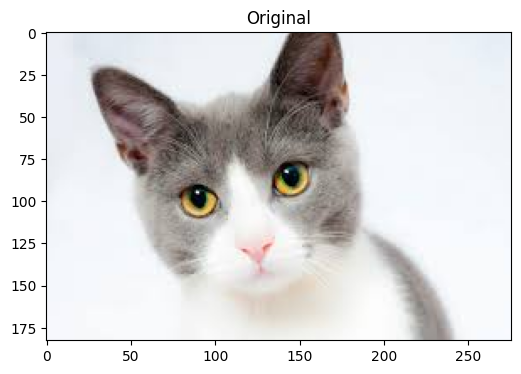

In [12]:
img_np_array = np.frombuffer(img_data, np.uint8)
img_bgr = cv2.imdecode(img_np_array, cv2.IMREAD_COLOR)

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.title("Original")
plt.show()

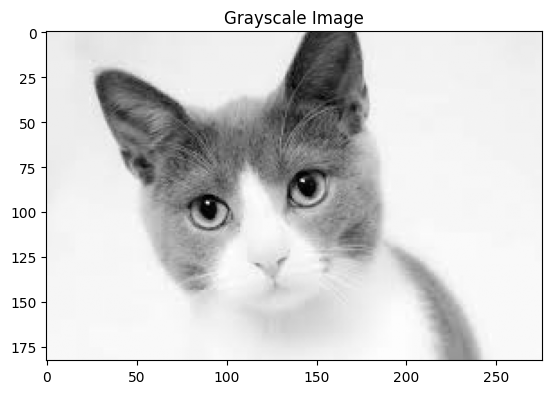

In [13]:

# Converting to grayscale using weighted sum formula

B = img_bgr[:,:,0]
G = img_bgr[:,:,1]
R = img_bgr[:,:,2]

# Weighted sum formula: Gray = 0.299R + 0.587G + 0.114B

grayscale_img = (0.114 * B) + (0.587 * G) + (0.299 * R)
grayscale_img = grayscale_img.astype(np.uint8)

plt.imshow(grayscale_img, cmap='gray')
plt.title("Grayscale Image")
plt.show()

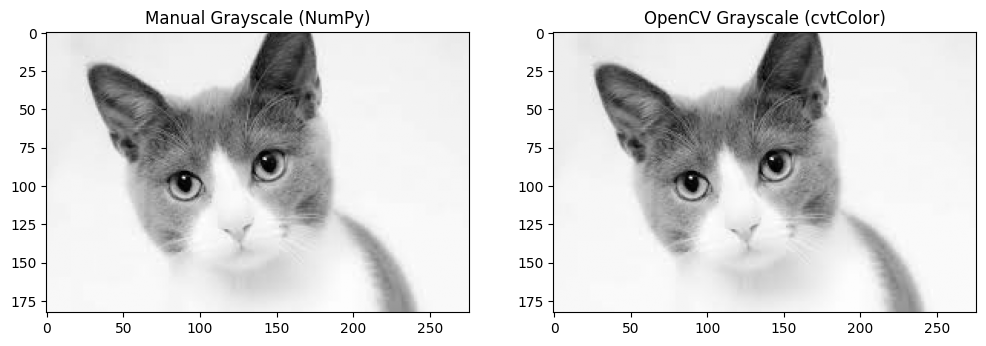

In [14]:
#using cvtColor function to convert to grayscale image

img_gray_cv2 = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(grayscale_img, cmap='gray')
ax[0].set_title("Manual Grayscale (NumPy)")

ax[1].imshow(img_gray_cv2, cmap='gray')
ax[1].set_title("OpenCV Grayscale (cvtColor)")
plt.show()

In [15]:
#Printing the array shapes
print(f"Shape of RGB image {img_rgb.shape}")
print(f"Shape of Grayscale image {img_gray_cv2.shape}")

# In output we can see the RGB image showing 3 dimension array whereas grayscle image showing two dimension array

Shape of RGB image (183, 276, 3)
Shape of Grayscale image (183, 276)


In [16]:
#Printing the pixels

print(f"RGB pixel {img_rgb[0,0]}")
print(f"RGB pixel {img_gray_cv2[0,4]}")

RGB pixel [233 236 243]
RGB pixel 236


## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [17]:
f = np.fft.fft2(img_gray_cv2)
f_shift = np.fft.fftshift(f)

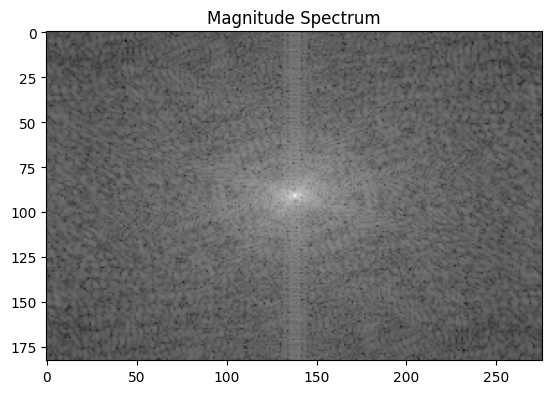

In [18]:
# Magnitude Spectrum
# We use np.abs() for calculating sqrt(real^2 + imaginary^2) and then take log() of it as the range of values is to massive
magnitude_spectrum = 20 * np.log(1 + np.abs(f_shift))

phase_spectrum = np.angle(f_shift) #Calculation of phase

#Plotting Magnitude Spectrum of the image
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum")
plt.show()


## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

Text(0.5, 1.0, 'LPF (Radius = 80)')

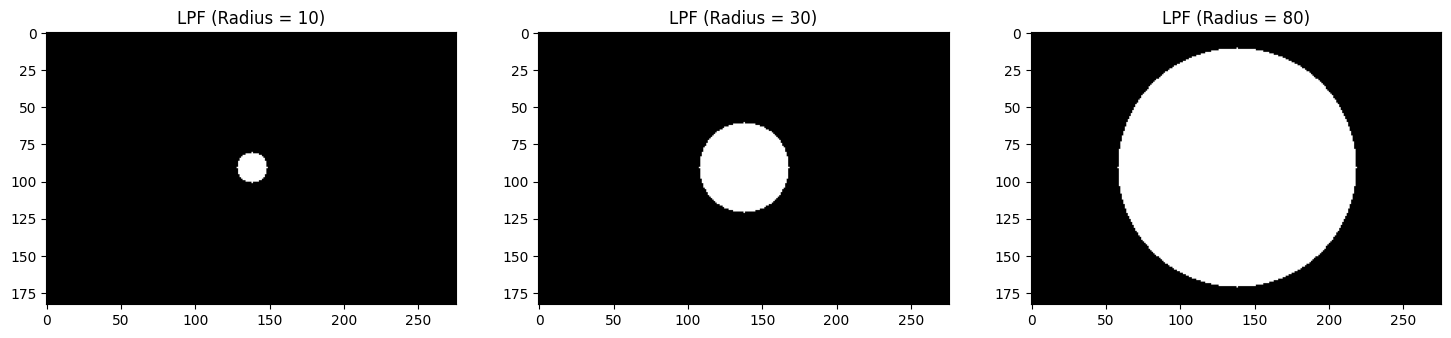

In [19]:
#LPF masks of radii of filter 10, 30 and 80

#Dimension of the image
rows, cols = img_gray_cv2.shape
crow,ccol = rows//2, cols//2 # to get the center of the circle of the mask

x = np.arange(cols)
y = np.arange(rows)
xx ,yy = np.meshgrid(x,y)

distance_from_center = np.sqrt((xx - ccol)**2 + (yy - crow)**2)

r1 = 10
r2 = 30
r3 = 80

mask1 = np.zeros((rows,cols))
mask1[distance_from_center <= r1] = 1

mask2 = np.zeros((rows,cols))
mask2[distance_from_center <= r2] = 1

mask3 = np.zeros((rows,cols))
mask3[distance_from_center <= r3] = 1

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

ax[0].imshow(mask1, cmap = 'gray')
ax[0].set_title("LPF (Radius = 10)")

ax[1].imshow(mask2, cmap = 'gray')
ax[1].set_title("LPF (Radius = 30)")

ax[2].imshow(mask3, cmap = 'gray')
ax[2].set_title("LPF (Radius = 80)")


Text(0.5, 1.0, 'Filtered Image (Radius = 80)')

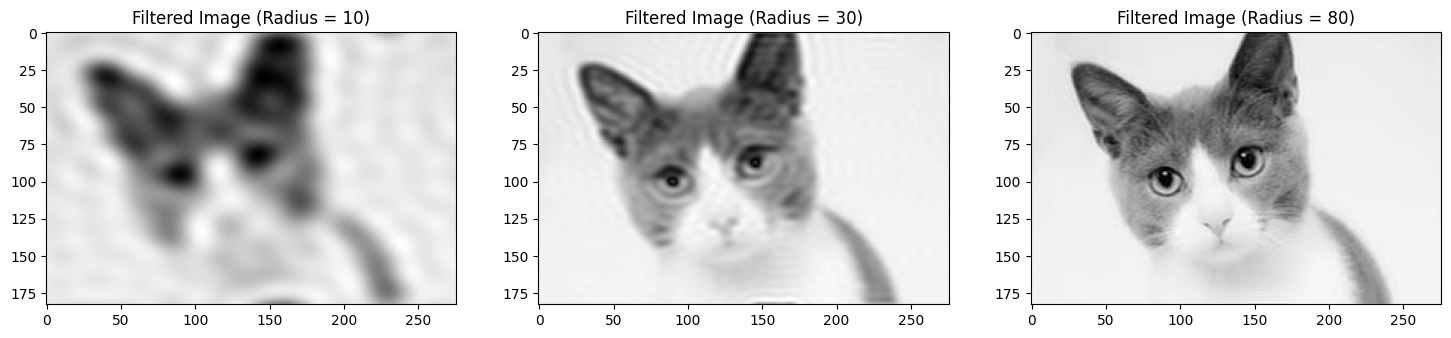

In [20]:
#Applying each masks to image to filter it
#In frequency domain we multiply masks with fourier transformed image

f_filtered_1 = mask1 * f_shift
f_filtered_2 = mask2 * f_shift
f_filtered_3 = mask3 * f_shift

#taking inverse fourier transfrom of the filtered image

f_ishift_1 = np.fft.ifftshift(f_filtered_1)
img_back_1 = np.fft.ifft2(f_ishift_1)
img_back_1 = np.abs(img_back_1)

f_ishift_2 = np.fft.ifftshift(f_filtered_2)
img_back_2 = np.fft.ifft2(f_ishift_2)
img_back_2 = np.abs(img_back_2)

f_ishift_3 = np.fft.ifftshift(f_filtered_3)
img_back_3 = np.fft.ifft2(f_ishift_3)
img_back_3 = np.abs(img_back_3)

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

ax[0].imshow(img_back_1, cmap = 'gray')
ax[0].set_title("Filtered Image (Radius = 10)")

ax[1].imshow(img_back_2, cmap = 'gray')
ax[1].set_title("Filtered Image (Radius = 30)")

ax[2].imshow(img_back_3, cmap = 'gray')
ax[2].set_title("Filtered Image (Radius = 80)")

#Blur level increasing as radius decreasing, as sharpness of image are in high frequencies, now for the lowest
#radius, more of the high frequencies (sharpness) gets filtered out, creating more blurry image.

Text(0.5, 1.0, 'High Pass Filtered Image')

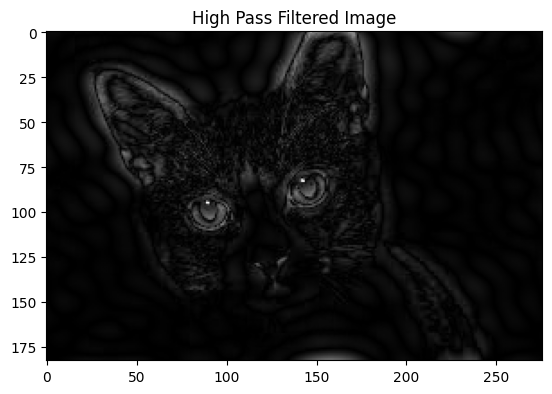

In [21]:
#Creating a High pass filter for radius 10
mask_hpf = 1-mask1
#applying high pass filter
f_filtered_hpf = mask_hpf * f_shift
#reconstructing back
f_ishift_hpf = np.fft.ifftshift(f_filtered_hpf)
img_back_hpf = np.fft.ifft2(f_ishift_hpf)
img_back_hpf = np.abs(img_back_hpf)

plt.imshow(img_back_hpf, cmap = 'gray')
plt.title("High Pass Filtered Image")


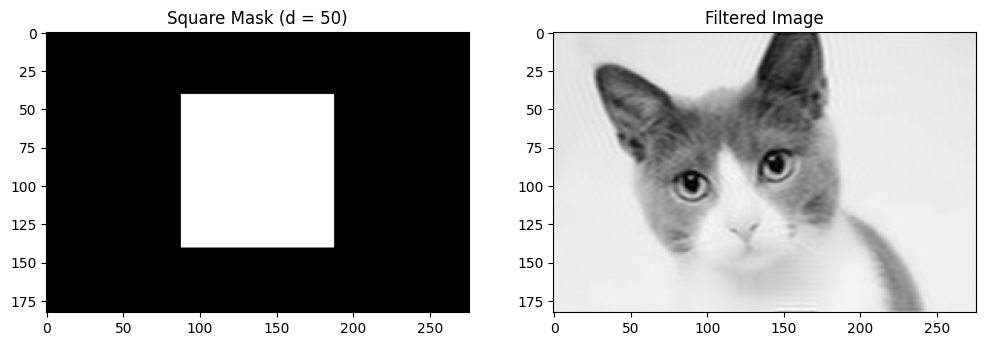

In [22]:
#dimension of the image was calculated above
d = 50 #side of lpf square
#creating the mask
mask_sq_lpf = np.zeros((rows,cols))
mask_sq_lpf[crow - d : crow + d, ccol - d : ccol + d] = 1

f_filtered_sq_lpf = mask_sq_lpf * f_shift

#reconstructing

f_ishift_sq_lpf = np.fft.ifftshift(f_filtered_sq_lpf)
img_back_sq_lpf = np.fft.ifft2(f_ishift_sq_lpf)
img_back_sq_lpf = np.abs(img_back_sq_lpf)

plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.imshow(mask_sq_lpf, cmap='gray')
plt.title('Square Mask (d = 50)')


plt.subplot(1, 2, 2)
plt.imshow(img_back_sq_lpf, cmap='gray')
plt.title('Filtered Image')

plt.show()

## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

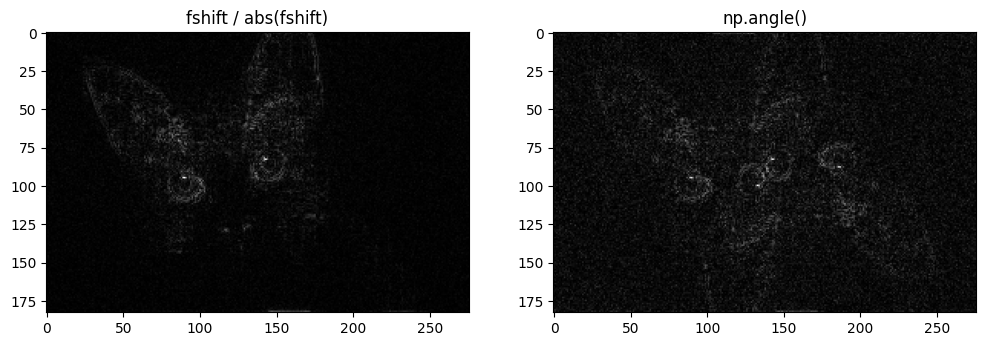

In [23]:
# _____D1_______

## Z = |z|e^i(theta) now, Z/|Z| = e^i(theta) -> complex number
phase_only = f_shift/np.abs(f_shift + 1e-10) #1e-10 to avoid 0 in denominator

f_ishift_phase_only = np.fft.ifftshift(phase_only)
img_back_phase_only = np.fft.ifft2(f_ishift_phase_only)
img_back_phase_only = np.abs(img_back_phase_only)

## Now np.angle(), just returns angle in radians, i.e. real number,
## it throws away imaginary structure which is necessary for ifft

angle_only = np.angle(f_shift)

f_ishift_angle_only = np.fft.ifftshift(angle_only)
img_back_angle_only = np.fft.ifft2(f_ishift_angle_only)
img_back_angle_only = np.abs(img_back_angle_only)

plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.imshow(img_back_phase_only, cmap='gray')
plt.title('fshift / abs(fshift)')


plt.subplot(1, 2, 2)
plt.imshow(img_back_angle_only, cmap='gray')
plt.title('np.angle()')

plt.show()

# Difference betweeen 'fshift / abs(fshift)' and 'np.angle(fshift)':
# 1. In first case it returns the complex value (e^i(theta))which ifft expects.
# 2. In second case it return the real value in from -pi to pi, ifft expects it magnitude or pixel intensities
#    if you try to inverse transform this, there will be unwanted noise as we can see in output.

Text(0.5, 1.0, 'Magnitude Spectrum')

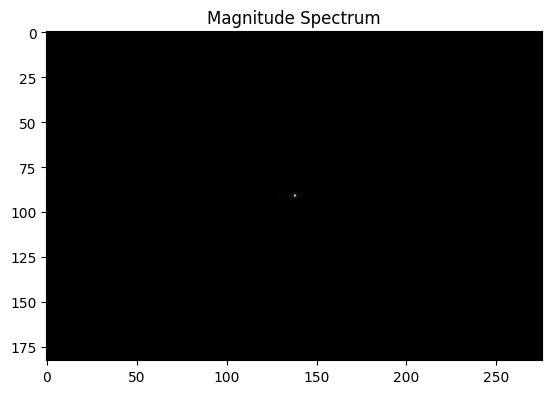

In [24]:
#_____D2______

mag_only = np.abs(f_shift)

f_ishift_mag_only = np.fft.ifftshift(mag_only)
img_back_mag_only = np.fft.ifft2(f_ishift_mag_only)
img_back_mag_only = np.abs(img_back_mag_only)

plt.imshow(mag_only, cmap = 'gray')
plt.title('Magnitude Spectrum')

#Magnitude only gives the information about how much frequency exists, it does not gives the spatial information of
#where that frequency exists, it is given by phase component. It is different from log, because log factor compresses
#the massive range of value, so that we can se details.
#Here, we are reconstructing from the RAW magnitude values. Since the DC component is very very larger than high
#frequencies,we see a single bright spot at the center.


## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

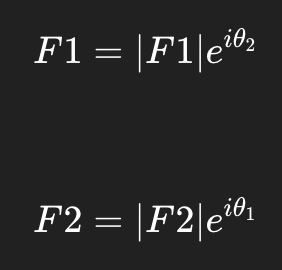

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [25]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.